In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import json
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


%matplotlib inline

In [32]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/DSF-1436 Fusion Incrementality Analysis/'

In [33]:
df = pd.read_csv(path+'data/dsf1436_user_retention_by_cohort.csv')
df = df.sort_values(['cohort','bucket'])
df = df[df['bucket'].apply(lambda x: x != 'not_in_exp')]
df

,cohort,bucket,users0,users,repurchase_d7,repurchase_d30,repurchase_d60,repurchase_d90,repurchase_d120,repurchase_d150,repurchase_d180,repurchase_d210,repurchase_d240,repurchase_d270,repurchase_d300,repurchase_d330,repurchase_d360,pct_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d,sd_2nd_phurcase_days_180d,pct_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d,sd_2nd_phurcase_days_360d,pct_repurchase_in_180d,pct_repurchase_in_360d,avg_orders_30d,avg_orders_60d,avg_orders_90d,avg_orders_180d,avg_orders_360d,sd_orders_30d,sd_orders_60d,sd_orders_90d,sd_orders_180d,sd_orders_360d,avg_gmv_30d,avg_gmv_60d,avg_gmv_90d,avg_gmv_180d,avg_gmv_360d,sd_gmv_30d,sd_gmv_60d,sd_gmv_90d,sd_gmv_180d,sd_gmv_360d,time
0,2020-01,ANDROID_CONTROL,25836,25831,0.112036,0.153459,0.109249,0.097015,0.077388,0.058031,0.046843,0.043591,0.039487,0.040184,0.045682,0.039178,0.037010,0.557973,15.142445,32.149538,0.578607,24.048261,56.999152,0.558128,0.578762,4.297105,5.090571,5.664190,6.751355,7.822728,7.102166,9.545886,11.486798,15.016514,18.966439,36.850079,43.978987,49.397199,60.667619,73.020002,72.847451,92.062940,108.437923,143.954900,187.077229,1628270562
1,2020-01,ANDROID_SHOW,363993,363929,0.121922,0.177889,0.134867,0.125415,0.101880,0.076617,0.063287,0.058382,0.054008,0.053887,0.059839,0.053216,0.050787,0.596616,17.532984,34.893835,0.623940,28.342535,61.981750,0.596748,0.624083,4.526730,5.503493,6.221059,7.719484,9.225331,7.739096,10.868915,13.232686,18.464394,23.738385,37.984702,46.518490,53.287882,68.862421,86.627314,82.445778,107.132609,127.788699,183.007574,250.028795,1628270562
2,2020-01,IOS_CONTROL,18826,18824,0.096579,0.128081,0.093604,0.089195,0.067680,0.048236,0.040108,0.035433,0.033415,0.032193,0.034371,0.030068,0.028368,0.537187,16.079562,33.776224,0.555674,24.158592,55.604937,0.537240,0.555727,4.093381,4.707426,5.164188,6.070063,6.958249,6.540519,8.531201,10.063554,13.415106,17.518334,35.395215,40.519810,44.988628,54.945955,66.346477,125.057988,133.361155,141.717784,165.821215,209.192203,1628270562
3,2020-01,IOS_SHOW,270656,270612,0.104995,0.153844,0.116979,0.111665,0.085647,0.062732,0.049783,0.046657,0.043143,0.041207,0.043930,0.039082,0.038254,0.566128,17.985802,35.380142,0.590284,28.029742,60.652505,0.566242,0.590414,4.273872,5.051301,5.630926,6.808022,7.918834,7.264859,10.694735,12.949160,16.806909,20.951708,36.440250,43.426205,49.237564,62.159874,76.413278,85.748794,108.902131,128.690278,171.791407,248.558628,1628270562
5,2020-02,ANDROID_CONTROL,24167,24160,0.106209,0.152483,0.131788,0.097930,0.069329,0.055836,0.051821,0.044950,0.045902,0.047392,0.043874,0.042012,0.034851,0.553974,16.167873,32.053298,0.576656,25.884315,58.314261,0.554139,0.576821,4.462407,5.372574,6.154260,7.289775,8.563206,7.931274,10.862615,13.270863,17.810690,22.146969,38.929188,47.592813,55.614703,67.794296,83.462992,79.231816,104.694154,132.565748,178.202361,238.652772,1628270562
6,2020-02,ANDROID_SHOW,348624,348551,0.120203,0.181184,0.163023,0.125158,0.092385,0.074445,0.067388,0.060579,0.059567,0.065035,0.057948,0.054586,0.048182,0.594805,18.768925,34.999138,0.623630,30.043221,62.584174,0.595006,0.623848,4.619513,5.709478,6.669472,8.080743,9.780437,8.833822,12.282428,15.311306,20.030989,25.950513,40.231612,50.776289,60.626272,76.055457,96.522095,89.554775,121.413365,150.068854,199.039210,274.295813,1628270562
7,2020-02,IOS_CONTROL,16174,16173,0.089779,0.136215,0.116614,0.082730,0.060286,0.043097,0.040994,0.037841,0.035058,0.036852,0.033574,0.033142,0.030730,0.504668,16.807041,32.072172,0.524083,25.801099,56.516395,0.504792,0.524207,3.819031,4.531347,5.142265,5.938667,6.883888,6.073482,8.145531,9.959854,13.245467,17.789865,34.225852,41.396073,48.029009,56.899314,69.347983,72.513231,92.873600,111.175335,140.382229,200.355308,1628270562
8,2020-02,IOS_SHOW,237075,237031,0.096823,0.162004,0.143770,0.107167,0.076231,0.059667,0.053170,0.048395,0.043977,0.047487,0.042973,0.040927,0.036181,0.551573,19.439277,35.264008,0.576465,29.891967,61.081691,0.551784,0.576705,4.08

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 88
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cohort                      72 non-null     object 
 1   bucket                      72 non-null     object 
 2   users0                      72 non-null     int64  
 3   users                       72 non-null     int64  
 4   repurchase_d7               72 non-null     float64
 5   repurchase_d30              72 non-null     float64
 6   repurchase_d60              72 non-null     float64
 7   repurchase_d90              72 non-null     float64
 8   repurchase_d120             72 non-null     float64
 9   repurchase_d150             72 non-null     float64
 10  repurchase_d180             72 non-null     float64
 11  repurchase_d210             72 non-null     float64
 12  repurchase_d240             72 non-null     float64
 13  repurchase_d270             72 non-nu

# Repurchase % in x days

In [35]:
rp_cols = []
for x in df.columns:
    if 'repurchase_d' in x:
        rp_cols.append(x)
rp_cols  

['repurchase_d7',
 'repurchase_d30',
 'repurchase_d60',
 'repurchase_d90',
 'repurchase_d120',
 'repurchase_d150',
 'repurchase_d180',
 'repurchase_d210',
 'repurchase_d240',
 'repurchase_d270',
 'repurchase_d300',
 'repurchase_d330',
 'repurchase_d360']

In [36]:
rp = df.sort_values(['cohort', 'bucket'])\
    [['cohort', 'bucket', 'users']+rp_cols].copy(deep=True)
rp.head()

,cohort,bucket,users,repurchase_d7,repurchase_d30,repurchase_d60,repurchase_d90,repurchase_d120,repurchase_d150,repurchase_d180,repurchase_d210,repurchase_d240,repurchase_d270,repurchase_d300,repurchase_d330,repurchase_d360
0,2020-01,ANDROID_CONTROL,25831,0.112036,0.153459,0.109249,0.097015,0.077388,0.058031,0.046843,0.043591,0.039487,0.040184,0.045682,0.039178,0.037010
1,2020-01,ANDROID_SHOW,363929,0.121922,0.177889,0.134867,0.125415,0.101880,0.076617,0.063287,0.058382,0.054008,0.053887,0.059839,0.053216,0.050787
2,2020-01,IOS_CONTROL,18824,0.096579,0.128081,0.093604,0.089195,0.067680,0.048236,0.040108,0.035433,0.033415,0.032193,0.034371,0.030068,0.028368
3,2020-01,IOS_SHOW,270612,0.104995,0.153844,0.116979,0.111665,0.085647,0.062732,0.049783,0.046657,0.043143,0.041207,0.043930,0.039082,0.038254
5,2020-02,ANDROID_CONTROL,24160,0.106209,0.152483,0.131788,0.097930,0.069329,0.055836,0.051821,0.044950,0.045902,0.047392,0.043874,0.042012,0.034851


## calculate diff

In [37]:
def show_control_diff(x, data, c, diff_pct=False):
    """
    x: row
    data: original dataframe
    c: column to calculate diff
    diff_pct: False is return absoluate diff, True is to return diff %
    """
    if 'CONTROL' in x['bucket']:
        return
    if 'SHOW' in x['bucket']:
        control_value = data[(data['cohort']==x['cohort']) & \
#                              (data['shipping_country']==x['shipping_country']) & \
                             (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][c].iloc[0]
        show_value = x[c]
        if diff_pct:
            return (show_value - control_value) / control_value
        else:
            return show_value - control_value

In [61]:
for c in rp_cols:
    rp[c+'_diff'] = rp.apply(lambda x: show_control_diff(x, rp, c, diff_pct=False), axis=1)
    
temp = zip(rp_cols, [c+'_diff' for c in rp_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

rp[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,repurchase_d7,repurchase_d7_diff,repurchase_d30,repurchase_d30_diff,repurchase_d60,repurchase_d60_diff,repurchase_d90,repurchase_d90_diff,repurchase_d120,repurchase_d120_diff,repurchase_d150,repurchase_d150_diff,repurchase_d180,repurchase_d180_diff,repurchase_d210,repurchase_d210_diff,repurchase_d240,repurchase_d240_diff,repurchase_d270,repurchase_d270_diff,repurchase_d300,repurchase_d300_diff,repurchase_d330,repurchase_d330_diff,repurchase_d360,repurchase_d360_diff
0,2020-01,ANDROID_CONTROL,25831,0.112036,NaN,0.153459,NaN,0.109249,NaN,0.097015,NaN,0.077388,NaN,0.058031,NaN,0.046843,NaN,0.043591,NaN,0.039487,NaN,0.040184,NaN,0.045682,NaN,0.039178,NaN,0.037010,NaN
1,2020-01,ANDROID_SHOW,363929,0.121922,0.009886,0.177889,0.024430,0.134867,0.025618,0.125415,0.028399,0.101880,0.024492,0.076617,0.018586,0.063287,0.016444,0.058382,0.014791,0.054008,0.014520,0.053887,0.013703,0.059839,0.014157,0.053216,0.014039,0.050787,0.013778
2,2020-01,IOS_CONTROL,18824,0.096579,NaN,0.128081,NaN,0.093604,NaN,0.089195,NaN,0.067680,NaN,0.048236,NaN,0.040108,NaN,0.035433,NaN,0.033415,NaN,0.032193,NaN,0.034371,NaN,0.030068,NaN,0.028368,NaN
3,2020-01,IOS_SHOW,270612,0.104995,0.008417,0.153844,0.025763,0.116979,0.023375,0.111665,0.022471,0.085647,0.017967,0.062732,0.014496,0.049783,0.009675,0.046657,0.011224,0.043143,0.009728,0.041207,0.009014,0.043930,0.009559,0.039082,0.009014,0.038254,0.009886
5,2020-02,ANDROID_CONTROL,24160,0.106209,NaN,0.152483,NaN,0.131788,NaN,0.097930,NaN,0.069329,NaN,0.055836,NaN,0.051821,NaN,0.044950,NaN,0.045902,NaN,0.047392,NaN,0.043874,NaN,0.042012,NaN,0.034851,NaN
6,2020-02,ANDROID_SHOW,348551,0.120203,0.013995,0.181184,0.028701,0.163023,0.031235,0.125158,0.027228,0.092385,0.023056,0.074445,0.018609,0.067388,0.015566,0.060579,0.015629,0.059567,0.013664,0.065035,0.017643,0.057948,0.014074,0.054586,0.012574,0.048182,0.013331
7,2020-02,IOS_CONTROL,16173,0.089779,NaN,0.136215,NaN,0.116614,NaN,0.082730,NaN,0.060286,NaN,0.043097,NaN,0.040994,NaN,0.037841,NaN,0.035058,NaN,0.036852,NaN,0.033574,NaN,0.033142,NaN,0.030730,NaN
8,2020-02,IOS_SHOW,237031,0.096823,0.007044,0.162004,0.025789,0.143770,0.027156,0.107167,0.024437,0.076231,0.015945,0.059667,0.016571,0.053170,0.012176,0.048395,0.010554,0.043977,0.008919,0.047487,0.010636,0.042973,0.009399,0.040927,0.007785,0.036181,0.005451
10,2020-03,ANDROID_CONTROL,25876,0.106083,NaN,0.166216,NaN,0.117329,NaN,0.079881,NaN,0.064461,NaN,0.058123,NaN,0.051399,NaN,0.048539,NaN,0.053640,NaN,0.047728,NaN,0.043477,NaN,0.037525,NaN,0.036095,NaN
11,2020-03,ANDROID_SHOW,391005,0.119241,0.013159,0.201509,0.035293,0.143318,0.025989,0.098863,0.018982,0.079981,0.015520,0.070777,0.012653,0.062194,0.010795,0.061309,0.012769,0.065373,0.011732,0.058301,0.010573,0.054759,0.011282,0.047810,0.010285,0.045966,0.009871


## proportion test

In [39]:
from statsmodels.stats.proportion import proportions_ztest
# https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html

def show_control_prop_test(x, data, pct_col, nobs_col, is_count=False, alternative='two-sided'):
    """
    x: row
    data: original dataframe
    pct_col: column name of numerator or the percentage calcualted
    nobs_col: column name of denominator
    is_count: False if pct_col is percentage, True if pct_col is the integer (numerator)
    """
    if 'CONTROL' in x['bucket']:
        return
    if 'SHOW' in x['bucket']:
        n_control = data[(data['cohort']==x['cohort']) & \
#                         (data['shipping_country']==x['shipping_country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][nobs_col].iloc[0]
        n_show = x[nobs_col]
        if is_count: 
            count_control = data[(data['cohort']==x['cohort']) & \
#                                  (data['shipping_country']==x['shipping_country']) & \
                                 (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][pct_col].iloc[0]
            count_show = x[pct_col]
        else:
            count_control = int(round(data[(data['cohort']==x['cohort']) & \
#                                      (data['shipping_country']==x['shipping_country']) & \
                                     (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][pct_col].iloc[0] * n_control,0))
            count_show = int(round(x[pct_col] * n_show, 0))
        
        stat, pval = proportions_ztest((count_control,count_show), (n_control,n_show), alternative=alternative)
        
        return round(pval, 2)

## Clean format

In [62]:
for c in rp_cols:
    rp[c+'_test'] = rp.apply(lambda x: \
         show_control_prop_test(x, rp, c, 'users', is_count=False, alternative='two-sided')
         , axis=1)
    rp[c+'_diff'] = rp.apply(lambda x: f"{round(x[c+'_diff']*100, 2)}" + \
                             ("" if np.isnan(x[c+'_diff']) else "%") + \
                             ('***' if x[c+'_test']<=0.05 else ''), axis=1)
    

temp = zip(rp_cols, [c+'_diff' for c in rp_cols])#, [c+'_test' for c in rp_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

rp[['cohort', 'bucket', 'users']+temp_cols]#.to_clipboard()

/usr/local/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [73]:
def color_pval(x):
    if '*' in str(x):
        if '-' in str(x):
            return "background-color: pink"
        else:
            return "background-color: lightgreen"
    return "background-color: white"
rp[['cohort', 'bucket', 'users']+temp_cols].style.applymap(color_pval)

,cohort,bucket,users,repurchase_d7,repurchase_d7_diff,repurchase_d30,repurchase_d30_diff,repurchase_d60,repurchase_d60_diff,repurchase_d90,repurchase_d90_diff,repurchase_d120,repurchase_d120_diff,repurchase_d150,repurchase_d150_diff,repurchase_d180,repurchase_d180_diff,repurchase_d210,repurchase_d210_diff,repurchase_d240,repurchase_d240_diff,repurchase_d270,repurchase_d270_diff,repurchase_d300,repurchase_d300_diff,repurchase_d330,repurchase_d330_diff,repurchase_d360,repurchase_d360_diff
0,2020-01,ANDROID_CONTROL,25831,0.112036,nan,0.153459,nan,0.109249,nan,0.097015,nan,0.077388,nan,0.058031,nan,0.046843,nan,0.043591,nan,0.039487,nan,0.040184,nan,0.045682,nan,0.039178,nan,0.037010,nan
1,2020-01,ANDROID_SHOW,363929,0.121922,0.99%***,0.177889,2.44%***,0.134867,2.56%***,0.125415,2.84%***,0.101880,2.45%***,0.076617,1.86%***,0.063287,1.64%***,0.058382,1.48%***,0.054008,1.45%***,0.053887,1.37%***,0.059839,1.42%***,0.053216,1.4%***,0.050787,1.38%***
2,2020-01,IOS_CONTROL,18824,0.096579,nan,0.128081,nan,0.093604,nan,0.089195,nan,0.067680,nan,0.048236,nan,0.040108,nan,0.035433,nan,0.033415,nan,0.032193,nan,0.034371,nan,0.030068,nan,0.028368,nan
3,2020-01,IOS_SHOW,270612,0.104995,0.84%***,0.153844,2.58%***,0.116979,2.34%***,0.111665,2.25%***,0.085647,1.8%***,0.062732,1.45%***,0.049783,0.97%***,0.046657,1.12%***,0.043143,0.97%***,0.041207,0.9%***,0.043930,0.96%***,0.039082,0.9%***,0.038254,0.99%***
5,2020-02,ANDROID_CONTROL,24160,0.106209,nan,0.152483,nan,0.131788,nan,0.097930,nan,0.069329,nan,0.055836,nan,0.051821,nan,0.044950,nan,0.045902,nan,0.047392,nan,0.043874,nan,0.042012,nan,0.034851,nan
6,2020-02,ANDROID_SHOW,348551,0.120203,1.4%***,0.181184,2.87%***,0.163023,3.12%***,0.125158,2.72%***,0.092385,2.31%***,0.074445,1.86%***,0.067388,1.56%***,0.060579,1.56%***,0.059567,1.37%***,0.065035,1.76%***,0.057948,1.41%***,0.054586,1.26%***,0.048182,1.33%***
7,2020-02,IOS_CONTROL,16173,0.089779,nan,0.136215,nan,0.116614,nan,0.082730,nan,0.060286,nan,0.043097,nan,0.040994,nan,0.037841,nan,0.035058,nan,0.036852,nan,0.033574,nan,0.033142,nan,0.030730,nan
8,2020-02,IOS_SHOW,237031,0.096823,0.7%***,0.162004,2.58%***,0.143770,2.72%***,0.107167,2.44%***,0.076231,1.59%***,0.059667,1.66%***,0.053170,1.22%***,0.048395,1.06%***,0.043977,0.89%***,0.047487,1.06%***,0.042973,0.94%***,0.040927,0.78%***,0.036181,0.55%***
10,2020-03,ANDROID_CONTROL,25876,0.106083,nan,0.166216,nan,0.117329,nan,0.079881,nan,0.064461,nan,0.058123,nan,0.051399,nan,0.048539,nan,0.053640,nan,0.047728,nan,0.043477,nan,0.037525,nan,0.036095,nan
11,2020-03,ANDROID_SHOW,391005,0.119241,1.32%***,0.201509,3.53%***,0.143318,2.6%***,0.098863,1.9%***,0.079981,1.55%***,0.070777,1.27%***,0.062194,1.08%***,0.061309,1.28%***,0.065373,1.17%***,0.058301,1.06%***,0.054759,1.13%***,0.047810,1.03%***,0.045966,0.99%***


# Retention 
for each cohort, avg number of days between the first purchase and second purchase, within 180/360d.

In [41]:
df.head()

,cohort,bucket,users0,users,repurchase_d7,repurchase_d30,repurchase_d60,repurchase_d90,repurchase_d120,repurchase_d150,repurchase_d180,repurchase_d210,repurchase_d240,repurchase_d270,repurchase_d300,repurchase_d330,repurchase_d360,pct_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d,sd_2nd_phurcase_days_180d,pct_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d,sd_2nd_phurcase_days_360d,pct_repurchase_in_180d,pct_repurchase_in_360d,avg_orders_30d,avg_orders_60d,avg_orders_90d,avg_orders_180d,avg_orders_360d,sd_orders_30d,sd_orders_60d,sd_orders_90d,sd_orders_180d,sd_orders_360d,avg_gmv_30d,avg_gmv_60d,avg_gmv_90d,avg_gmv_180d,avg_gmv_360d,sd_gmv_30d,sd_gmv_60d,sd_gmv_90d,sd_gmv_180d,sd_gmv_360d,time
0,2020-01,ANDROID_CONTROL,25836,25831,0.112036,0.153459,0.109249,0.097015,0.077388,0.058031,0.046843,0.043591,0.039487,0.040184,0.045682,0.039178,0.037010,0.557973,15.142445,32.149538,0.578607,24.048261,56.999152,0.558128,0.578762,4.297105,5.090571,5.664190,6.751355,7.822728,7.102166,9.545886,11.486798,15.016514,18.966439,36.850079,43.978987,49.397199,60.667619,73.020002,72.847451,92.062940,108.437923,143.954900,187.077229,1628270562
1,2020-01,ANDROID_SHOW,363993,363929,0.121922,0.177889,0.134867,0.125415,0.101880,0.076617,0.063287,0.058382,0.054008,0.053887,0.059839,0.053216,0.050787,0.596616,17.532984,34.893835,0.623940,28.342535,61.981750,0.596748,0.624083,4.526730,5.503493,6.221059,7.719484,9.225331,7.739096,10.868915,13.232686,18.464394,23.738385,37.984702,46.518490,53.287882,68.862421,86.627314,82.445778,107.132609,127.788699,183.007574,250.028795,1628270562
2,2020-01,IOS_CONTROL,18826,18824,0.096579,0.128081,0.093604,0.089195,0.067680,0.048236,0.040108,0.035433,0.033415,0.032193,0.034371,0.030068,0.028368,0.537187,16.079562,33.776224,0.555674,24.158592,55.604937,0.537240,0.555727,4.093381,4.707426,5.164188,6.070063,6.958249,6.540519,8.531201,10.063554,13.415106,17.518334,35.395215,40.519810,44.988628,54.945955,66.346477,125.057988,133.361155,141.717784,165.821215,209.192203,1628270562
3,2020-01,IOS_SHOW,270656,270612,0.104995,0.153844,0.116979,0.111665,0.085647,0.062732,0.049783,0.046657,0.043143,0.041207,0.043930,0.039082,0.038254,0.566128,17.985802,35.380142,0.590284,28.029742,60.652505,0.566242,0.590414,4.273872,5.051301,5.630926,6.808022,7.918834,7.264859,10.694735,12.949160,16.806909,20.951708,36.440250,43.426205,49.237564,62.159874,76.413278,85.748794,108.902131,128.690278,171.791407,248.558628,1628270562
5,2020-02,ANDROID_CONTROL,24167,24160,0.106209,0.152483,0.131788,0.097930,0.069329,0.055836,0.051821,0.044950,0.045902,0.047392,0.043874,0.042012,0.034851,0.553974,16.167873,32.053298,0.576656,25.884315,58.314261,0.554139,0.576821,4.462407,5.372574,6.154260,7.289775,8.563206,7.931274,10.862615,13.270863,17.810690,22.146969,38.929188,47.592813,55.614703,67.794296,83.462992,79.231816,104.694154,132.565748,178.202361,238.652772,1628270562


In [42]:
ret_cols = []
for x in df.columns:
    if '2nd_phurcase_days_' in x:
        ret_cols.append(x)
ret_cols  

['pct_2nd_phurcase_days_180d',
 'avg_2nd_phurcase_days_180d',
 'sd_2nd_phurcase_days_180d',
 'pct_2nd_phurcase_days_360d',
 'avg_2nd_phurcase_days_360d',
 'sd_2nd_phurcase_days_360d']

In [43]:
ret = df[df['bucket'].apply(lambda x: x!='not_in_exp')].sort_values(['cohort', 'bucket'])\
    [['cohort', 'bucket', 'users']+ret_cols].copy(deep=True)
ret.tail()

,cohort,bucket,users,pct_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d,sd_2nd_phurcase_days_180d,pct_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d,sd_2nd_phurcase_days_360d
83,2021-05,IOS_SHOW,182648,0.408556,9.982789,16.488607,0.408556,9.982789,16.488607
85,2021-06,ANDROID_CONTROL,16765,0.441396,6.484700,10.805552,0.441396,6.484700,10.805552
86,2021-06,ANDROID_SHOW,312843,0.435621,6.605862,10.969296,0.435621,6.605862,10.969296
87,2021-06,IOS_CONTROL,7477,0.379564,6.940702,11.273661,0.379564,6.940702,11.273661
88,2021-06,IOS_SHOW,137645,0.373933,7.003613,11.218958,0.373933,7.003613,11.218958


## Calculate diff

In [44]:
for c in ret_cols:
    ret[c+'_diff'] = ret.apply(lambda x: show_control_diff(x, ret, c, diff_pct=False), axis=1)
    
temp = zip(['avg_2nd_phurcase_days_180d', 'avg_2nd_phurcase_days_360d'], [c+'_diff' for c in ['avg_2nd_phurcase_days_180d', 'avg_2nd_phurcase_days_360d']])
temp_cols = [l1 for l2 in temp for l1 in l2]

ret[['cohort', 'bucket', 'users']+temp_cols].head()

,cohort,bucket,users,avg_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d_diff,avg_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d_diff
0,2020-01,ANDROID_CONTROL,25831,15.142445,NaN,24.048261,NaN
1,2020-01,ANDROID_SHOW,363929,17.532984,2.390538,28.342535,4.294274
2,2020-01,IOS_CONTROL,18824,16.079562,NaN,24.158592,NaN
3,2020-01,IOS_SHOW,270612,17.985802,1.906241,28.029742,3.871150
5,2020-02,ANDROID_CONTROL,24160,16.167873,NaN,25.884315,NaN


## t test

In [45]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://github.com/scipy/scipy/blob/v1.7.1/scipy/stats/stats.py#L5879-

from scipy.stats import distributions

def _unequal_var_ttest_denom(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    with np.errstate(divide='ignore', invalid='ignore'):
        dof = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))

    # If dof is undefined, variances are zero (assumes n1 > 0 & n2 > 0).
    # Hence it doesn't matter what dof is as long as it's not NaN.
    dof = np.where(np.isnan(dof), 1, dof)
    denom = np.sqrt(vn1 + vn2)
    return dof, denom

def _ttest_finish(dof, t, alternative):
    """Common code between all 3 t-test functions."""
    if alternative == 'less':
        prob = distributions.t.cdf(t, dof)
    elif alternative == 'greater':
        prob = distributions.t.sf(t, dof)
    elif alternative == 'two-sided':
        prob = 2 * distributions.t.sf(np.abs(t), dof)
    else:
        raise ValueError("alternative must be "
                         "'less', 'greater' or 'two-sided'")
    return t, prob

def _ttest_ind_from_stats(mean1, mean2, denom, dof, alternative):

    d = mean1 - mean2
    with np.errstate(divide='ignore', invalid='ignore'):
        t = np.divide(d, denom)
    t, prob = _ttest_finish(dof, t, alternative)

    return (t, prob)



def unequal_var_ttest(v1, v2, n1, n2, m1, m2, alternative='two-sided'):
    dof, denom = _unequal_var_ttest_denom(v1, n1, v2, n2)
    t, pval = _ttest_ind_from_stats(m1, m2, denom, dof, alternative)
    
    return t, pval

In [46]:


def show_control_t_test(x, data, avg_col, std_col, n_col, alternative='two-sided'):
    """
    x: row
    data: original dataframe
    """
    if 'CONTROL' in x['bucket']:
        return
    if 'SHOW' in x['bucket']:
        v_control = data[(data['cohort']==x['cohort']) & \
#                         (data['shipping_country']==x['shipping_country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][std_col].iloc[0] ** 2
        v_show = x[std_col] ** 2
        
        n_control = data[(data['cohort']==x['cohort']) & \
#                         (data['shipping_country']==x['shipping_country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][n_col].iloc[0]
        n_show = x[n_col]
        
        m_control = data[(data['cohort']==x['cohort']) & \
#                         (data['shipping_country']==x['shipping_country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_CONTROL'))][avg_col].iloc[0]
        m_show = x[avg_col]
        
        t, pval = unequal_var_ttest(v_control, v_show, n_control, n_show, m_control, m_show, alternative)
        
        return round(pval, 4)


In [47]:
ret['users_2nd_phurcase_days_180d'] = (ret['pct_2nd_phurcase_days_180d'] * ret['users']).apply(lambda x: round(x, 0)).astype(int)
ret['users_2nd_phurcase_days_360d'] = (ret['pct_2nd_phurcase_days_360d'] * ret['users']).apply(lambda x: round(x, 0)).astype(int)

for c in ['2nd_phurcase_days_180d', '2nd_phurcase_days_360d']:
    ret[c+'_pval'] = ret.apply(lambda x: \
                                 show_control_t_test(x, data=ret, \
                                                     avg_col='avg_'+c, \
                                                     std_col='sd_'+c, \
                                                     n_col='users_'+c, \
                                                     alternative='two-sided') , axis=1)

    ret['avg_'+c+'_diff2'] = ret.apply(lambda x: f"{round(x['avg_'+c+'_diff'], 2)}" + \
                             ('***' if x[c+'_pval']<=0.05 else ''), axis=1)
    

temp = zip(['avg_2nd_phurcase_days_180d', 'avg_2nd_phurcase_days_360d'], ['avg_'+c+'_diff2' for c in ['2nd_phurcase_days_180d', '2nd_phurcase_days_360d']])#, [c+'_test' for c in ret_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

ret[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,avg_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d_diff2,avg_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,15.142445,nan,24.048261,nan
1,2020-01,ANDROID_SHOW,363929,17.532984,2.39***,28.342535,4.29***
2,2020-01,IOS_CONTROL,18824,16.079562,nan,24.158592,nan
3,2020-01,IOS_SHOW,270612,17.985802,1.91***,28.029742,3.87***
5,2020-02,ANDROID_CONTROL,24160,16.167873,nan,25.884315,nan
6,2020-02,ANDROID_SHOW,348551,18.768925,2.6***,30.043221,4.16***
7,2020-02,IOS_CONTROL,16173,16.807041,nan,25.801099,nan
8,2020-02,IOS_SHOW,237031,19.439277,2.63***,29.891967,4.09***
10,2020-03,ANDROID_CONTROL,25876,15.423176,nan,24.326133,nan
11,2020-03,ANDROID_SHOW,391005,16.974725,1.55***,28.000068,3.67***


In [48]:
ret.head()

,cohort,bucket,users,pct_2nd_phurcase_days_180d,avg_2nd_phurcase_days_180d,sd_2nd_phurcase_days_180d,pct_2nd_phurcase_days_360d,avg_2nd_phurcase_days_360d,sd_2nd_phurcase_days_360d,pct_2nd_phurcase_days_180d_diff,avg_2nd_phurcase_days_180d_diff,sd_2nd_phurcase_days_180d_diff,pct_2nd_phurcase_days_360d_diff,avg_2nd_phurcase_days_360d_diff,sd_2nd_phurcase_days_360d_diff,users_2nd_phurcase_days_180d,users_2nd_phurcase_days_360d,2nd_phurcase_days_180d_pval,avg_2nd_phurcase_days_180d_diff2,2nd_phurcase_days_360d_pval,avg_2nd_phurcase_days_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,0.557973,15.142445,32.149538,0.578607,24.048261,56.999152,NaN,NaN,NaN,NaN,NaN,NaN,14413,14946,NaN,nan,NaN,nan
1,2020-01,ANDROID_SHOW,363929,0.596616,17.532984,34.893835,0.623940,28.342535,61.981750,0.038643,2.390538,2.744297,0.045333,4.294274,4.982597,217126,227070,0.0,2.39***,0.0,4.29***
2,2020-01,IOS_CONTROL,18824,0.537187,16.079562,33.776224,0.555674,24.158592,55.604937,NaN,NaN,NaN,NaN,NaN,NaN,10112,10460,NaN,nan,NaN,nan
3,2020-01,IOS_SHOW,270612,0.566128,17.985802,35.380142,0.590284,28.029742,60.652505,0.028941,1.906241,1.603917,0.034611,3.871150,5.047567,153201,159738,0.0,1.91***,0.0,3.87***
5,2020-02,ANDROID_CONTROL,24160,0.553974,16.167873,32.053298,0.576656,25.884315,58.314261,NaN,NaN,NaN,NaN,NaN,NaN,13384,13932,NaN,nan,NaN,nan


# Not churn rate (repurchased in 180/360d)
for each cohort, % users who never repurchase again within 180d/360d

In [49]:
nc_cols = []
for x in df.columns:
    if 'ct_repurchase_in_' in x:
        nc_cols.append(x)
nc_cols  

['pct_repurchase_in_180d', 'pct_repurchase_in_360d']

In [50]:
nc = df[df['bucket'].apply(lambda x: x!='not_in_exp')].sort_values(['cohort', 'bucket'])\
    [['cohort', 'bucket', 'users']+nc_cols].copy(deep=True)
nc.head()

,cohort,bucket,users,pct_repurchase_in_180d,pct_repurchase_in_360d
0,2020-01,ANDROID_CONTROL,25831,0.558128,0.578762
1,2020-01,ANDROID_SHOW,363929,0.596748,0.624083
2,2020-01,IOS_CONTROL,18824,0.537240,0.555727
3,2020-01,IOS_SHOW,270612,0.566242,0.590414
5,2020-02,ANDROID_CONTROL,24160,0.554139,0.576821


## calculate diff

In [51]:
for c in nc_cols:
    nc[c+'_diff'] = nc.apply(lambda x: show_control_diff(x, nc, c, diff_pct=False), axis=1)
    
temp = zip(nc_cols, [c+'_diff' for c in nc_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

nc[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,pct_repurchase_in_180d,pct_repurchase_in_180d_diff,pct_repurchase_in_360d,pct_repurchase_in_360d_diff
0,2020-01,ANDROID_CONTROL,25831,0.558128,NaN,0.578762,NaN
1,2020-01,ANDROID_SHOW,363929,0.596748,0.038620,0.624083,0.045321
2,2020-01,IOS_CONTROL,18824,0.537240,NaN,0.555727,NaN
3,2020-01,IOS_SHOW,270612,0.566242,0.029003,0.590414,0.034687
5,2020-02,ANDROID_CONTROL,24160,0.554139,NaN,0.576821,NaN
6,2020-02,ANDROID_SHOW,348551,0.595006,0.040867,0.623848,0.047027
7,2020-02,IOS_CONTROL,16173,0.504792,NaN,0.524207,NaN
8,2020-02,IOS_SHOW,237031,0.551784,0.046992,0.576705,0.052498
10,2020-03,ANDROID_CONTROL,25876,0.555805,NaN,0.576789,NaN
11,2020-03,ANDROID_SHOW,391005,0.594877,0.039073,0.623074,0.046285


## proportion test

In [52]:
for c in nc_cols:
    nc[c+'_test'] = nc.apply(lambda x: \
         show_control_prop_test(x, nc, c, 'users', is_count=False, alternative='two-sided')
         , axis=1)
    nc[c+'_diff'] = nc.apply(lambda x: f"{round(x[c+'_diff']*100, 2)}" + \
                             ("" if np.isnan(x[c+'_diff']) else "%") + \
                             ('***' if x[c+'_test']<=0.05 else ''), axis=1)
    

temp = zip(nc_cols, [c+'_diff' for c in nc_cols])#, [c+'_test' for c in nc_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

nc[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,pct_repurchase_in_180d,pct_repurchase_in_180d_diff,pct_repurchase_in_360d,pct_repurchase_in_360d_diff
0,2020-01,ANDROID_CONTROL,25831,0.558128,nan,0.578762,nan
1,2020-01,ANDROID_SHOW,363929,0.596748,3.86%***,0.624083,4.53%***
2,2020-01,IOS_CONTROL,18824,0.537240,nan,0.555727,nan
3,2020-01,IOS_SHOW,270612,0.566242,2.9%***,0.590414,3.47%***
5,2020-02,ANDROID_CONTROL,24160,0.554139,nan,0.576821,nan
6,2020-02,ANDROID_SHOW,348551,0.595006,4.09%***,0.623848,4.7%***
7,2020-02,IOS_CONTROL,16173,0.504792,nan,0.524207,nan
8,2020-02,IOS_SHOW,237031,0.551784,4.7%***,0.576705,5.25%***
10,2020-03,ANDROID_CONTROL,25876,0.555805,nan,0.576789,nan
11,2020-03,ANDROID_SHOW,391005,0.594877,3.91%***,0.623074,4.63%***


# LTV
for each cohort, avg orders/gmv per user(including churned user (LTV = zero)) in the 30d, 90d, 180d, 360d. 

## Orders

In [53]:
ltvo_cols = []
for x in df.columns:
    if '_orders_' in x:
        ltvo_cols.append(x)
ltvo_cols  

['avg_orders_30d',
 'avg_orders_60d',
 'avg_orders_90d',
 'avg_orders_180d',
 'avg_orders_360d',
 'sd_orders_30d',
 'sd_orders_60d',
 'sd_orders_90d',
 'sd_orders_180d',
 'sd_orders_360d']

In [54]:
ltvo = df[df['bucket'].apply(lambda x: x != 'not_in_exp')].sort_values(['cohort', 'bucket'])\
    [['cohort', 'bucket', 'users']+ltvo_cols].copy(deep=True)
ltvo.tail()

,cohort,bucket,users,avg_orders_30d,avg_orders_60d,avg_orders_90d,avg_orders_180d,avg_orders_360d,sd_orders_30d,sd_orders_60d,sd_orders_90d,sd_orders_180d,sd_orders_360d
83,2021-05,IOS_SHOW,182648,3.743295,4.305022,4.527752,4.528809,4.528809,6.854084,9.123866,9.951970,9.955432,9.955432
85,2021-06,ANDROID_CONTROL,16765,4.059943,4.498390,4.498449,4.498449,4.498449,7.939729,9.245894,9.246597,9.246597,9.246597
86,2021-06,ANDROID_SHOW,312843,4.096747,4.564867,4.565384,4.565384,4.565384,7.468042,9.122395,9.124978,9.124978,9.124978
87,2021-06,IOS_CONTROL,7477,3.593152,3.924702,3.924702,3.924702,3.924702,5.693316,6.727551,6.727551,6.727551,6.727551
88,2021-06,IOS_SHOW,137645,3.631489,3.957200,3.957388,3.957388,3.957388,6.341642,7.369740,7.369866,7.369866,7.369866


### Calculate diff


In [55]:
for c in [
    'avg_orders_30d',
     'avg_orders_60d',
     'avg_orders_90d',
     'avg_orders_180d',
     'avg_orders_360d'
    ]:
    ltvo[c+'_diff'] = ltvo.apply(lambda x: show_control_diff(x, ltvo, c, diff_pct=False), axis=1)
    
temp = zip([
    'avg_orders_30d',
     'avg_orders_60d',
     'avg_orders_90d',
     'avg_orders_180d',
     'avg_orders_360d'
    ], [c+'_diff' for c in [
    'avg_orders_30d',
     'avg_orders_60d',
     'avg_orders_90d',
     'avg_orders_180d',
     'avg_orders_360d'
    ]])
temp_cols = [l1 for l2 in temp for l1 in l2]

ltvo[['cohort', 'bucket', 'users']+temp_cols].head()

,cohort,bucket,users,avg_orders_30d,avg_orders_30d_diff,avg_orders_60d,avg_orders_60d_diff,avg_orders_90d,avg_orders_90d_diff,avg_orders_180d,avg_orders_180d_diff,avg_orders_360d,avg_orders_360d_diff
0,2020-01,ANDROID_CONTROL,25831,4.297105,NaN,5.090571,NaN,5.664190,NaN,6.751355,NaN,7.822728,NaN
1,2020-01,ANDROID_SHOW,363929,4.526730,0.229625,5.503493,0.412922,6.221059,0.556870,7.719484,0.968129,9.225331,1.402603
2,2020-01,IOS_CONTROL,18824,4.093381,NaN,4.707426,NaN,5.164188,NaN,6.070063,NaN,6.958249,NaN
3,2020-01,IOS_SHOW,270612,4.273872,0.180490,5.051301,0.343875,5.630926,0.466739,6.808022,0.737959,7.918834,0.960585
5,2020-02,ANDROID_CONTROL,24160,4.462407,NaN,5.372574,NaN,6.154260,NaN,7.289775,NaN,8.563206,NaN


### t test

In [75]:

for c in ['orders_30d',
     'orders_60d',
     'orders_90d',
     'orders_180d',
     'orders_360d']:
    ltvo[c+'_pval'] = ltvo.apply(lambda x: \
                                 show_control_t_test(x, data=ltvo, \
                                                     avg_col='avg_'+c, \
                                                     std_col='sd_'+c, \
                                                     n_col='users', \
                                                     alternative='two-sided') , axis=1)

    ltvo['avg_'+c+'_diff2'] = ltvo.apply(lambda x: f"{round(x['avg_'+c+'_diff'], 2)}" + \
                             ('***' if x[c+'_pval']<=0.05 else ''), axis=1)
    

temp = zip(['avg_orders_30d',
             'avg_orders_60d',
             'avg_orders_90d',
             'avg_orders_180d',
             'avg_orders_360d'], ['avg_'+c+'_diff2' for c in ['orders_30d',
                                                             'orders_60d',
                                                             'orders_90d',
                                                             'orders_180d',
                                                             'orders_360d']])#, [c+'_test' for c in ltvo_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

ltvo[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,avg_orders_30d,avg_orders_30d_diff2,avg_orders_60d,avg_orders_60d_diff2,avg_orders_90d,avg_orders_90d_diff2,avg_orders_180d,avg_orders_180d_diff2,avg_orders_360d,avg_orders_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,4.297105,nan,5.090571,nan,5.664190,nan,6.751355,nan,7.822728,nan
1,2020-01,ANDROID_SHOW,363929,4.526730,0.23***,5.503493,0.41***,6.221059,0.56***,7.719484,0.97***,9.225331,1.4***
2,2020-01,IOS_CONTROL,18824,4.093381,nan,4.707426,nan,5.164188,nan,6.070063,nan,6.958249,nan
3,2020-01,IOS_SHOW,270612,4.273872,0.18***,5.051301,0.34***,5.630926,0.47***,6.808022,0.74***,7.918834,0.96***
5,2020-02,ANDROID_CONTROL,24160,4.462407,nan,5.372574,nan,6.154260,nan,7.289775,nan,8.563206,nan
6,2020-02,ANDROID_SHOW,348551,4.619513,0.16***,5.709478,0.34***,6.669472,0.52***,8.080743,0.79***,9.780437,1.22***
7,2020-02,IOS_CONTROL,16173,3.819031,nan,4.531347,nan,5.142265,nan,5.938667,nan,6.883888,nan
8,2020-02,IOS_SHOW,237031,4.084627,0.27***,4.953344,0.42***,5.702196,0.56***,6.777610,0.84***,8.002312,1.12***
10,2020-03,ANDROID_CONTROL,25876,4.640031,nan,5.662906,nan,6.297720,nan,7.266345,nan,8.543818,nan
11,2020-03,ANDROID_SHOW,391005,4.849247,0.21***,6.100757,0.44***,6.885845,0.59***,8.091930,0.83***,9.766394,1.22***


In [78]:
ltvo[['cohort', 'bucket', 'users']+temp_cols].style.applymap(color_pval)

,cohort,bucket,users,avg_orders_30d,avg_orders_30d_diff2,avg_orders_60d,avg_orders_60d_diff2,avg_orders_90d,avg_orders_90d_diff2,avg_orders_180d,avg_orders_180d_diff2,avg_orders_360d,avg_orders_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,4.297105,nan,5.090571,nan,5.664190,nan,6.751355,nan,7.822728,nan
1,2020-01,ANDROID_SHOW,363929,4.526730,0.23***,5.503493,0.41***,6.221059,0.56***,7.719484,0.97***,9.225331,1.4***
2,2020-01,IOS_CONTROL,18824,4.093381,nan,4.707426,nan,5.164188,nan,6.070063,nan,6.958249,nan
3,2020-01,IOS_SHOW,270612,4.273872,0.18***,5.051301,0.34***,5.630926,0.47***,6.808022,0.74***,7.918834,0.96***
5,2020-02,ANDROID_CONTROL,24160,4.462407,nan,5.372574,nan,6.154260,nan,7.289775,nan,8.563206,nan
6,2020-02,ANDROID_SHOW,348551,4.619513,0.16***,5.709478,0.34***,6.669472,0.52***,8.080743,0.79***,9.780437,1.22***
7,2020-02,IOS_CONTROL,16173,3.819031,nan,4.531347,nan,5.142265,nan,5.938667,nan,6.883888,nan
8,2020-02,IOS_SHOW,237031,4.084627,0.27***,4.953344,0.42***,5.702196,0.56***,6.777610,0.84***,8.002312,1.12***
10,2020-03,ANDROID_CONTROL,25876,4.640031,nan,5.662906,nan,6.297720,nan,7.266345,nan,8.543818,nan
11,2020-03,ANDROID_SHOW,391005,4.849247,0.21***,6.100757,0.44***,6.885845,0.59***,8.091930,0.83***,9.766394,1.22***


## GMV

In [57]:
ltvg_cols = []
for x in df.columns:
    if '_gmv_' in x:
        ltvg_cols.append(x)
ltvg_cols  

['avg_gmv_30d',
 'avg_gmv_60d',
 'avg_gmv_90d',
 'avg_gmv_180d',
 'avg_gmv_360d',
 'sd_gmv_30d',
 'sd_gmv_60d',
 'sd_gmv_90d',
 'sd_gmv_180d',
 'sd_gmv_360d']

In [58]:
ltvg = df[df['bucket'].apply(lambda x: x!='not_in_exp')].sort_values(['cohort', 'bucket'])\
    [['cohort', 'bucket', 'users']+ltvg_cols].copy(deep=True)
ltvg.tail()

,cohort,bucket,users,avg_gmv_30d,avg_gmv_60d,avg_gmv_90d,avg_gmv_180d,avg_gmv_360d,sd_gmv_30d,sd_gmv_60d,sd_gmv_90d,sd_gmv_180d,sd_gmv_360d
83,2021-05,IOS_SHOW,182648,52.578335,60.221739,63.139754,63.155782,63.155782,133.352578,155.904664,165.951668,166.001556,166.001556
85,2021-06,ANDROID_CONTROL,16765,50.410804,55.920698,55.921751,55.921751,55.921751,137.106337,152.262577,152.269673,152.269673,152.269673
86,2021-06,ANDROID_SHOW,312843,49.892583,55.471700,55.479303,55.479303,55.479303,105.432952,123.933763,123.957012,123.957012,123.957012
87,2021-06,IOS_CONTROL,7477,49.785780,54.723902,54.723902,54.723902,54.723902,97.427141,112.077848,112.077848,112.077848,112.077848
88,2021-06,IOS_SHOW,137645,49.713712,54.118591,54.120106,54.120106,54.120106,118.467060,132.698879,132.699458,132.699458,132.699458


### calculate diff

In [59]:
for c in [
    'avg_gmv_30d',
     'avg_gmv_60d',
     'avg_gmv_90d',
     'avg_gmv_180d',
     'avg_gmv_360d'
    ]:
    ltvg[c+'_diff'] = ltvg.apply(lambda x: show_control_diff(x, ltvg, c, diff_pct=False), axis=1)
    
temp = zip([
    'avg_gmv_30d',
     'avg_gmv_60d',
     'avg_gmv_90d',
     'avg_gmv_180d',
     'avg_gmv_360d'
    ], [c+'_diff' for c in [
    'avg_gmv_30d',
     'avg_gmv_60d',
     'avg_gmv_90d',
     'avg_gmv_180d',
     'avg_gmv_360d'
    ]])
temp_cols = [l1 for l2 in temp for l1 in l2]

ltvg[['cohort', 'bucket', 'users']+temp_cols].head()

,cohort,bucket,users,avg_gmv_30d,avg_gmv_30d_diff,avg_gmv_60d,avg_gmv_60d_diff,avg_gmv_90d,avg_gmv_90d_diff,avg_gmv_180d,avg_gmv_180d_diff,avg_gmv_360d,avg_gmv_360d_diff
0,2020-01,ANDROID_CONTROL,25831,36.850079,NaN,43.978987,NaN,49.397199,NaN,60.667619,NaN,73.020002,NaN
1,2020-01,ANDROID_SHOW,363929,37.984702,1.134623,46.518490,2.539503,53.287882,3.890683,68.862421,8.194802,86.627314,13.607312
2,2020-01,IOS_CONTROL,18824,35.395215,NaN,40.519810,NaN,44.988628,NaN,54.945955,NaN,66.346477,NaN
3,2020-01,IOS_SHOW,270612,36.440250,1.045035,43.426205,2.906395,49.237564,4.248936,62.159874,7.213919,76.413278,10.066801
5,2020-02,ANDROID_CONTROL,24160,38.929188,NaN,47.592813,NaN,55.614703,NaN,67.794296,NaN,83.462992,NaN


### t test

In [79]:

for c in ['gmv_30d',
     'gmv_60d',
     'gmv_90d',
     'gmv_180d',
     'gmv_360d']:
    ltvg[c+'_pval'] = ltvg.apply(lambda x: \
                                 show_control_t_test(x, data=ltvg, \
                                                     avg_col='avg_'+c, \
                                                     std_col='sd_'+c, \
                                                     n_col='users', \
                                                     alternative='two-sided') , axis=1)

    ltvg['avg_'+c+'_diff2'] = ltvg.apply(lambda x: f"{round(x['avg_'+c+'_diff'], 2)}" + \
                             ('***' if x[c+'_pval']<=0.05 else ''), axis=1)
    

temp = zip(['avg_gmv_30d',
             'avg_gmv_60d',
             'avg_gmv_90d',
             'avg_gmv_180d',
             'avg_gmv_360d'], ['avg_'+c+'_diff2' for c in ['gmv_30d',
                                                             'gmv_60d',
                                                             'gmv_90d',
                                                             'gmv_180d',
                                                             'gmv_360d']])#, [c+'_test' for c in ltvg_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

ltvg[['cohort', 'bucket', 'users']+temp_cols]

,cohort,bucket,users,avg_gmv_30d,avg_gmv_30d_diff2,avg_gmv_60d,avg_gmv_60d_diff2,avg_gmv_90d,avg_gmv_90d_diff2,avg_gmv_180d,avg_gmv_180d_diff2,avg_gmv_360d,avg_gmv_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,36.850079,nan,43.978987,nan,49.397199,nan,60.667619,nan,73.020002,nan
1,2020-01,ANDROID_SHOW,363929,37.984702,1.13***,46.518490,2.54***,53.287882,3.89***,68.862421,8.19***,86.627314,13.61***
2,2020-01,IOS_CONTROL,18824,35.395215,nan,40.519810,nan,44.988628,nan,54.945955,nan,66.346477,nan
3,2020-01,IOS_SHOW,270612,36.440250,1.05,43.426205,2.91***,49.237564,4.25***,62.159874,7.21***,76.413278,10.07***
5,2020-02,ANDROID_CONTROL,24160,38.929188,nan,47.592813,nan,55.614703,nan,67.794296,nan,83.462992,nan
6,2020-02,ANDROID_SHOW,348551,40.231612,1.3***,50.776289,3.18***,60.626272,5.01***,76.055457,8.26***,96.522095,13.06***
7,2020-02,IOS_CONTROL,16173,34.225852,nan,41.396073,nan,48.029009,nan,56.899314,nan,69.347983,nan
8,2020-02,IOS_SHOW,237031,36.351169,2.13***,45.282392,3.89***,53.328279,5.3***,65.966999,9.07***,81.903638,12.56***
10,2020-03,ANDROID_CONTROL,25876,45.281683,nan,56.382766,nan,63.401651,nan,75.315130,nan,92.325744,nan
11,2020-03,ANDROID_SHOW,391005,47.211592,1.93***,60.899910,4.52***,69.533507,6.13***,84.097016,8.78***,105.414968,13.09***


In [80]:
ltvg[['cohort', 'bucket', 'users']+temp_cols].style.applymap(color_pval)

,cohort,bucket,users,avg_gmv_30d,avg_gmv_30d_diff2,avg_gmv_60d,avg_gmv_60d_diff2,avg_gmv_90d,avg_gmv_90d_diff2,avg_gmv_180d,avg_gmv_180d_diff2,avg_gmv_360d,avg_gmv_360d_diff2
0,2020-01,ANDROID_CONTROL,25831,36.850079,nan,43.978987,nan,49.397199,nan,60.667619,nan,73.020002,nan
1,2020-01,ANDROID_SHOW,363929,37.984702,1.13***,46.518490,2.54***,53.287882,3.89***,68.862421,8.19***,86.627314,13.61***
2,2020-01,IOS_CONTROL,18824,35.395215,nan,40.519810,nan,44.988628,nan,54.945955,nan,66.346477,nan
3,2020-01,IOS_SHOW,270612,36.440250,1.05,43.426205,2.91***,49.237564,4.25***,62.159874,7.21***,76.413278,10.07***
5,2020-02,ANDROID_CONTROL,24160,38.929188,nan,47.592813,nan,55.614703,nan,67.794296,nan,83.462992,nan
6,2020-02,ANDROID_SHOW,348551,40.231612,1.3***,50.776289,3.18***,60.626272,5.01***,76.055457,8.26***,96.522095,13.06***
7,2020-02,IOS_CONTROL,16173,34.225852,nan,41.396073,nan,48.029009,nan,56.899314,nan,69.347983,nan
8,2020-02,IOS_SHOW,237031,36.351169,2.13***,45.282392,3.89***,53.328279,5.3***,65.966999,9.07***,81.903638,12.56***
10,2020-03,ANDROID_CONTROL,25876,45.281683,nan,56.382766,nan,63.401651,nan,75.315130,nan,92.325744,nan
11,2020-03,ANDROID_SHOW,391005,47.211592,1.93***,60.899910,4.52***,69.533507,6.13***,84.097016,8.78***,105.414968,13.09***


# Retention reason deep dive

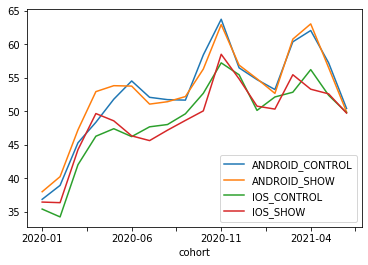

In [87]:
df.set_index('cohort').groupby('bucket')['avg_gmv_30d'].plot()
plt.legend()